In [25]:
import re
import json
import pandas as pd
import numpy as np
import io
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

In [23]:
# Load the data from the uploaded CSV file
file_path = '../past_data/separate_by_products/roses_prices_1.csv'
data = pd.read_csv(file_path)


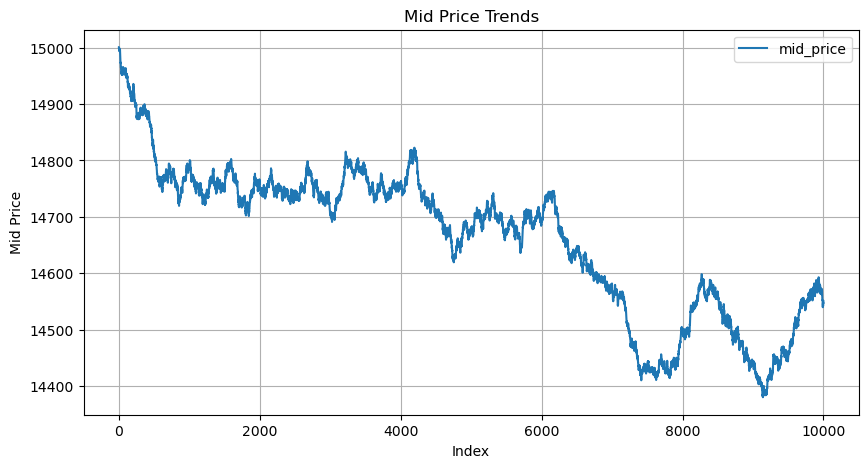

In [22]:

# Plot the 'Gift_Basket_Mid_Price'
plt.figure(figsize=(10, 5))
plt.plot(data['mid_price'], label='mid_price')
plt.title('Mid Price Trends')
plt.xlabel('Index')
plt.ylabel('Mid Price')
plt.legend()
plt.grid(True)
plt.show()

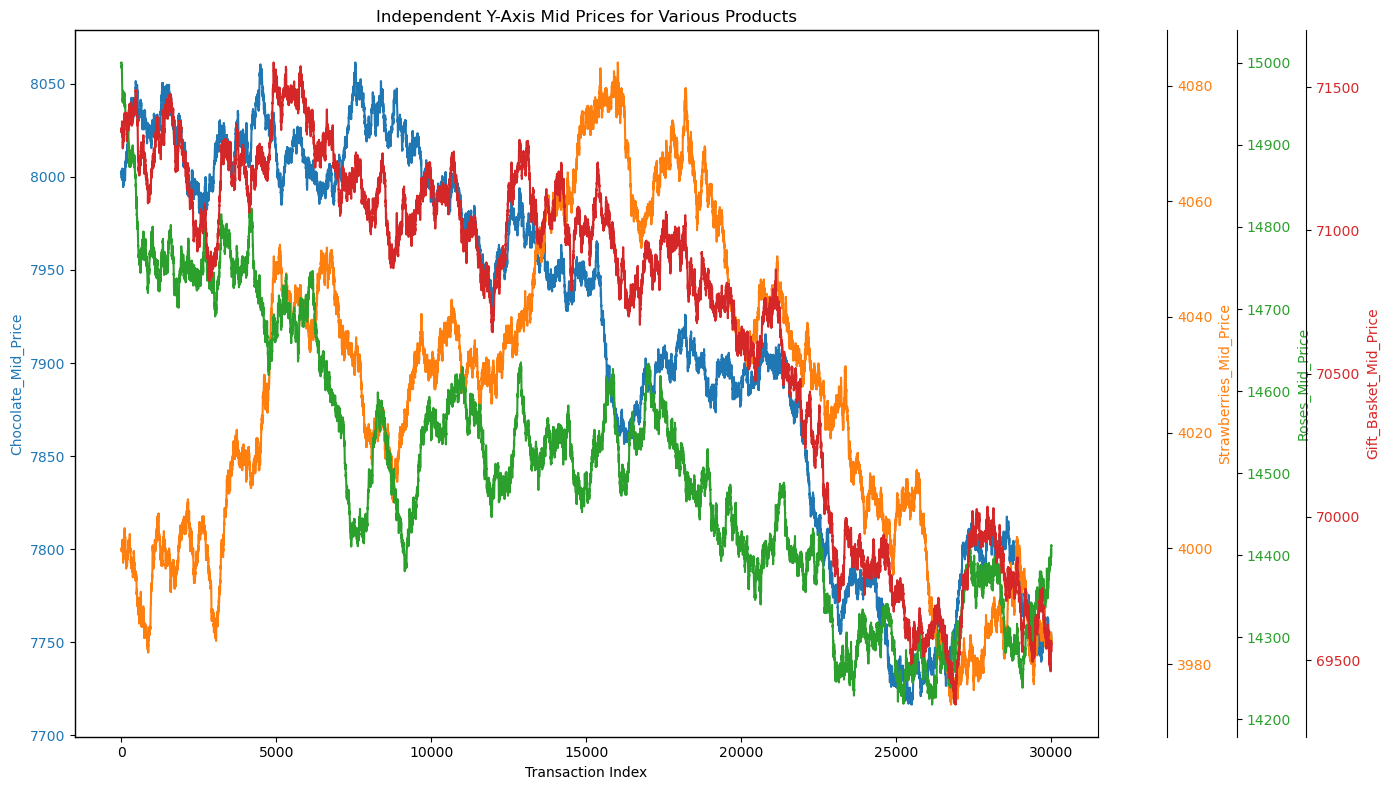

In [37]:
prices_df = pd.read_csv("../past_data/combined_mid_prices.csv")
# Adjusting the figure to better accommodate multiple y-axes without overlap
fig, ax1 = plt.subplots(figsize=(14, 8))

# Colors for each product line
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
products = prices_df.columns

# Create axes for each line plot
axes = [ax1]
for i in range(1, 4):
    # Creating additional axes with offset for better visibility
    new_ax = ax1.twinx()
    new_ax.spines['right'].set_position(('outward', 50 * i))  # Offset each additional y-axis to the right
    axes.append(new_ax)

# Plot each line on its respective axis
for i, product in enumerate(products):
    axes[i].plot(prices_df[product], color=colors[i], label=product)
    axes[i].set_ylabel(product, color=colors[i])
    axes[i].tick_params(axis='y', labelcolor=colors[i])

# Title and x-axis
ax1.set_title('Independent Y-Axis Mid Prices for Various Products')
ax1.set_xlabel('Transaction Index')

# Improving the layout
fig.tight_layout()  # Automatically adjust subplot params to give specified padding
plt.show()

In [36]:
time_steps = time_steps = np.arange(1, 8 + 1).reshape(-1, 1)
X_bias = np.hstack([np.ones((time_steps.shape[0], 1)), time_steps])
basket_premium = [299, 300, 306, 305, 310, 316, 317, 323, 328]
premiums = basket_premium[-8:]
premiums

# Calculating coefficients using the normal equation
theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(premiums)

# # Using the coefficients to predict the next price
next_time_step_with_bias = np.array([[1, len(premiums) + 1]])
predicted_premium = next_time_step_with_bias.dot(theta)
predicted_premium

array([330.42857143])